## Install and import libraries

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tqdm import tqdm_notebook as tqdm
import tensorflow

In [3]:
#read in ESG data
tech_comms_df = pd.read_csv('Tech and Comms Sustainability Scores 2.csv', index_col=0)
tech_comms_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021
Name,,,,,,,,
Apple Inc.,AAPL,16.9,Tech,A,A,A,BBB,BBB
Microsoft Corporation,MSFT,14.6,Tech,AAA,AAA,AAA,AAA,AAA
Visa Inc. Class A,V,17.4,Tech,A,A,A,A,A
NVIDIA Corporation,NVDA,13.3,Tech,AA,AAA,AAA,AAA,AAA
Mastercard Incorporated Class A,MA,16.3,Tech,BBB,BBB,A,A,A
...,...,...,...,...,...,...,...,...
T-Mobile US,TMUS,26.7,Communication Services,BB,B,B,BB,BB
Take-Two Interacti,TTWO,17.3,Communication Services,BBB,BBB,BBB,BBB,BBB
Twitter Inc,TWTR,24.9,Communication Services,B,B,BB,BB,BB


In [4]:
#Import list of tickers
tickers_df = pd.read_csv('Tech and Comms Sustainability Scores.csv', index_col=0)
tickers_df

,Ticker,Sustainalytics Score,Sector
Name,,,
Apple Inc.,AAPL,16.9,Tech
Microsoft Corporation,MSFT,14.6,Tech
Visa Inc. Class A,V,17.4,Tech
NVIDIA Corporation,NVDA,13.3,Tech
Mastercard Incorporated Class A,MA,16.3,Tech
...,...,...,...
T-Mobile US,TMUS,26.7,Communication Services
Take-Two Interacti,TTWO,17.3,Communication Services
Twitter Inc,TWTR,24.9,Communication Services


## 2019~2021 df

In [9]:
#for loop that pulls data for ticker from Yahoo finance and adds to new df
tickers_list = tickers_df['Ticker'].tolist()
full_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2019-01-01', end='2021-04-28')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_df = pd.concat([full_df, temp_df], axis=1)
    except:
        continue

In [10]:
full_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735,101.750000,98.940002,99.550003,101.120003,...,43.619999,45.660000,4704600.0,43.237495,56.160000,55.279999,56.160000,56.020000,13969700.0,50.405243
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851,100.190002,97.199997,100.099998,97.400002,...,45.330002,46.130001,5106600.0,43.682560,56.990002,56.060001,56.299999,56.220001,19245400.0,50.585201
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364,102.510002,98.930000,99.720001,101.930000,...,46.599998,47.169998,3917700.0,44.667377,56.889999,55.950001,56.490002,56.360001,17035800.0,50.711178
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041,103.269997,100.980003,101.639999,102.059998,...,47.130001,47.669998,3413800.0,45.140850,57.259998,56.549999,56.759998,56.720001,16349000.0,51.035088
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.694466,103.970001,101.709999,103.040001,102.800003,...,48.009998,48.369999,3219900.0,45.803715,58.689999,57.049999,57.270000,58.380001,21424600.0,52.528713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.716278,261.779999,255.639999,260.209991,257.170013,...,42.250000,40.730000,60658800.0,40.730000,58.090000,57.139999,57.939999,57.279999,20921900.0,57.279999
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.092239,261.510010,257.269989,257.880005,261.149994,...,40.869999,41.709999,40878500.0,41.709999,57.470001,56.779999,57.130001,57.299999,18099400.0,57.299999
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562,262.440002,260.170013,261.660004,261.549988,...,42.439999,41.820000,30501300.0,41.820000,57.389999,56.849998,57.360001,56.939999,15073600.0,56.939999


In [11]:
full_df.to_csv('full_df.csv')

In [36]:
#drop everything but close columns, then divide price on April 28, 2021 by price on January 1, 2019 to get percent return for each stock

cols_to_keep = [e for e in full_df.columns.tolist() if 'Close' in e]
first = full_df[cols_to_keep].iloc[0,:]
last = full_df[cols_to_keep].iloc[584,:]
return_19_21_df = pd.DataFrame(last/first, columns = ['return']) 
return_19_21_df.index = [e.replace('_Close', '') for e in return_19_21_df.index.tolist()]
return_19_21_df.reset_index(inplace=True)
return_19_21_df

,index,return
0,AAPL,3.383485
1,AAPL_Adj Close,3.469157
2,MSFT,2.517405
3,MSFT_Adj Close,2.587637
4,V,1.756320
...,...,...
183,TWTR_Adj Close,2.280458
184,VIAC,0.907359
185,VIAC_Adj Close,0.958196
186,VZ,1.007319


In [40]:
#merge data frame so returns during time period shown for each stock
tech_comms_df_final = tech_comms_df.merge(return_19_21_df, left_on='Ticker', right_on='index')
tech_comms_df_final

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index,return
0,AAPL,16.9,Tech,A,A,A,BBB,BBB,AAPL,3.383485
1,MSFT,14.6,Tech,AAA,AAA,AAA,AAA,AAA,MSFT,2.517405
2,V,17.4,Tech,A,A,A,A,A,V,1.756320
3,NVDA,13.3,Tech,AA,AAA,AAA,AAA,AAA,NVDA,4.485905
4,MA,16.3,Tech,BBB,BBB,A,A,A,MA,2.085222
...,...,...,...,...,...,...,...,...,...,...
89,TMUS,26.7,Communication Services,BB,B,B,BB,BB,TMUS,2.023904
90,TTWO,17.3,Communication Services,BBB,BBB,BBB,BBB,BBB,TTWO,1.676570
91,TWTR,24.9,Communication Services,B,B,BB,BB,BB,TWTR,2.280458
92,VIAC,16.1,Communication Services,B,B,B,BB,BBB,VIAC,0.907359


In [41]:
#code the MSCI ESG scores to be numerical instead of categorical
dict  = {'CCC':0, 'B':1, 'BB':2, 'BBB':3, 'A':4, 'AA':5, 'AAA':6}
years = ['MSCI ESG 2017', 'MSCI ESG 2018', 'MSCI ESG 2019', 'MSCI ESG 2020', 'MSCI ESG 2021']
for y in years:
    tech_comms_df_final[y] = tech_comms_df_final[y].map(dict)
tech_comms_df_final

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222
...,...,...,...,...,...,...,...,...,...,...
89,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904
90,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570
91,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458
92,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359


In [49]:
tech_comms_df_final.to_csv('tech_comms_df_final.csv')

## 2017 df

In [20]:
#create for loop to pull stock data for 2017 and add as column

full_2017_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2017-01-01', end='2017-12-31')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2017_df = pd.concat([full_2017_df, temp_df], axis=1)
    except:
        continue

In [12]:
#drop adj. close columns
adj = [e for e in full_df.columns.tolist() if 'Adj' in e]
full_df = full_df.drop(adj, axis=1)

In [21]:
full_2017_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.413372,62.840000,62.130001,62.790001,62.580002,...,65.410004,64.389999,3553800.0,59.437092,54.669998,53.730000,53.959999,54.580002,22891700.0,44.711304
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.382690,62.750000,62.119999,62.480000,62.299999,...,64.660004,65.739998,5365500.0,60.683247,54.810001,54.330002,54.549999,54.520000,18316100.0,44.662155
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.521944,62.660000,62.029999,62.189999,62.299999,...,65.669998,65.480003,4186500.0,60.443253,54.830002,54.299999,54.779999,54.639999,13840600.0,44.760460
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.828764,63.150002,62.040001,62.299999,62.840000,...,65.500000,64.290001,5275500.0,59.344784,53.779999,53.099998,53.669998,53.259998,15615000.0,44.096455
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.083660,63.080002,62.540001,62.759998,62.639999,...,64.129997,63.480000,3595700.0,58.597084,53.270000,52.669998,53.220001,52.680000,14097200.0,43.616238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,43.855000,43.625000,43.669998,43.752499,65397600.0,41.969559,85.629997,84.919998,85.400002,85.510002,...,60.360001,60.169998,2404500.0,56.193924,53.630001,53.060001,53.110001,53.189999,13657800.0,45.690029
2017-12-26,42.867500,42.419998,42.700001,42.642502,132742000.0,40.904797,85.529999,85.029999,85.309998,85.400002,...,59.869999,60.189999,1647800.0,56.212601,53.689999,53.130001,53.130001,53.220001,6595800.0,45.715801
2017-12-27,42.695000,42.427502,42.525002,42.650002,85992800.0,40.911991,85.980003,85.220001,85.650002,85.709999,...,60.349998,59.290001,3696300.0,55.372074,53.500000,53.090000,53.410000,53.279999,8361900.0,45.767342


In [22]:
full_2017_df.to_csv('full_2017_df.csv')

In [23]:
#create DF of just tickers and 2017 returns
cols_to_keep = [e for e in full_2017_df.columns.tolist() if '_Close' in e]
first17 = full_2017_df[cols_to_keep].iloc[0,:]
last17 = full_2017_df[cols_to_keep].iloc[-1,:]
return_2017_df = pd.DataFrame(last17/first17, columns = ['return']) 
return_2017_df.index = [e.replace('_Close', '') for e in return_2017_df.index.tolist()]
return_2017_df.reset_index(inplace=True)
return_2017_df

,index,return
0,AAPL,1.456995
1,MSFT,1.366890
2,V,1.434214
3,NVDA,1.896873
4,MA,1.436189
...,...,...
83,T,0.903766
84,TTWO,2.230394
85,TWTR,1.460462
86,VIAC,0.916291


In [24]:
#merge 2017 returns to overall DF
returns_2017_final_df = tech_comms_df_final.merge(return_2017_df, left_on='Ticker', right_on='index')
returns_2017_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,return_x,index_y,return_y
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189
...,...,...,...,...,...,...,...,...,...,...,...,...
81,T,19.1,Communication Services,2.0,3.0,2.0,2.0,2.0,T,1.048070,T,0.903766
82,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394
83,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462
84,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291


In [25]:
#rename new column
returns_2017_final_df.rename(columns={"return_x" : "2019-2021 Returns", "return_y": "2017 Returns"}, inplace = True)
returns_2017_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189
...,...,...,...,...,...,...,...,...,...,...,...,...
81,T,19.1,Communication Services,2.0,3.0,2.0,2.0,2.0,T,1.048070,T,0.903766
82,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394
83,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462
84,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291


## 2018 df

In [26]:
#create for loop to pull stock data for 2018 and add as column

full_2018_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2018-01-01', end='2018-12-31')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2018_df = pd.concat([full_2018_df, temp_df], axis=1)
    except:
        continue

In [27]:
full_2018_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.310070,86.309998,85.500000,86.129997,85.949997,...,58.189999,59.169998,3177600.0,55.260002,53.570000,52.799999,53.160000,53.529999,16045300.0,45.982079
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.302879,86.510002,85.970001,86.059998,86.349998,...,59.200001,59.200001,2966100.0,55.288021,53.340000,52.180000,53.299999,52.430000,16662400.0,45.037197
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.494736,87.660004,86.570000,86.589996,87.110001,...,59.430000,58.000000,6646500.0,54.167320,52.889999,51.830002,52.369999,52.599998,12062800.0,45.183224
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.967163,88.410004,87.430000,87.660004,88.190002,...,58.259998,57.580002,3169300.0,53.775074,52.880001,52.349998,52.799999,52.480000,13348900.0,45.080143
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.811283,88.580002,87.599998,88.199997,88.279999,...,57.580002,56.759998,3633100.0,53.009251,52.750000,52.040001,52.560001,52.389999,16212700.0,45.002834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.740280,97.970001,93.980003,97.680000,94.129997,...,42.639999,42.020000,1921300.0,39.790611,55.040001,52.939999,54.680000,53.049999,15077200.0,47.732922
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,38.257172,100.690002,93.959999,95.139999,100.559998,...,42.240002,43.369999,4512900.0,41.068993,54.470001,52.400002,53.230000,54.439999,17970500.0,48.983608
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,38.008892,101.190002,96.400002,99.300003,101.180000,...,42.770000,43.369999,4001900.0,41.068993,55.169998,53.349998,54.310001,55.150002,17531000.0,49.622452


In [28]:
full_2018_df.to_csv('full_2018_df.csv')

In [29]:
#create DF of just tickers and 2018 returns
cols_to_keep = [e for e in full_2018_df.columns.tolist() if '_Close' in e]
first18 = full_2018_df[cols_to_keep].iloc[0,:]
last18 = full_2018_df[cols_to_keep].iloc[-1,:]
return_2018_df = pd.DataFrame(last18/first18, columns = ['return']) 
return_2018_df.index = [e.replace('_Close', '') for e in return_2018_df.index.tolist()]
return_2018_df.reset_index(inplace=True)
return_2018_df

,index,return
0,AAPL,0.915709
1,MSFT,1.181734
2,V,1.152214
3,NVDA,0.669676
4,MA,1.241854
...,...,...
82,TMUS,0.993285
83,TTWO,0.911942
84,TWTR,1.172583
85,VIAC,0.738888


In [30]:
#merge 2018 returns to overall DF
returns_2018_final_df = returns_2017_final_df.merge(return_2018_df, left_on='Ticker', right_on='index')
returns_2018_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,T,19.1,Communication Services,2.0,3.0,2.0,2.0,2.0,T,1.048070,T,0.903766,T,0.740529
72,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942
73,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583
74,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888


In [31]:
#rename new column
returns_2018_final_df.rename(columns={"return" : "2018 Returns"}, inplace = True)
returns_2018_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index,2018 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,T,19.1,Communication Services,2.0,3.0,2.0,2.0,2.0,T,1.048070,T,0.903766,T,0.740529
72,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942
73,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583
74,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888


## 2019 df

In [32]:
#create for loop to pull stock data for 2019 and add as column

full_2019_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2019-01-01', end='2019-12-31')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2019_df = pd.concat([full_2019_df, temp_df], axis=1)
    except:
        continue

In [33]:
full_2019_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735,101.750000,98.940002,99.550003,101.120003,...,43.619999,45.660000,4704600.0,43.237495,56.160000,55.279999,56.160000,56.020000,13969700.0,50.405243
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851,100.190002,97.199997,100.099998,97.400002,...,45.330002,46.130001,5106600.0,43.682560,56.990002,56.060001,56.299999,56.220001,19245400.0,50.585201
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364,102.510002,98.930000,99.720001,101.930000,...,46.599998,47.169998,3917700.0,44.667377,56.889999,55.950001,56.490002,56.360001,17035800.0,50.711178
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041,103.269997,100.980003,101.639999,102.059998,...,47.130001,47.669998,3413800.0,45.140850,57.259998,56.549999,56.759998,56.720001,16349000.0,51.035088
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.694466,103.970001,101.709999,103.040001,102.800003,...,48.009998,48.369999,3219900.0,45.803715,58.689999,57.049999,57.270000,58.380001,21424600.0,52.528713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.234581,157.710007,157.119995,157.479996,157.380005,...,42.180000,42.020000,2824200.0,40.251926,61.459999,61.020000,61.459999,61.279999,6640100.0,57.471848
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.628067,158.729996,157.399994,157.559998,158.669998,...,42.209999,42.660000,3522000.0,40.864998,61.369999,61.110001,61.279999,61.290001,8117800.0,57.481236
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.600876,159.550003,158.220001,159.449997,158.960007,...,42.549999,41.759998,4175900.0,40.002869,61.619999,61.250000,61.389999,61.529999,8166800.0,57.706314


In [34]:
full_2019_df.to_csv('full_2019_df.csv')

In [35]:
#create DF of just tickers and 2019 returns
cols_to_keep = [e for e in full_2019_df.columns.tolist() if '_Close' in e]
first19 = full_2019_df[cols_to_keep].iloc[0,:]
last19 = full_2019_df[cols_to_keep].iloc[-1,:]
return_2019_df = pd.DataFrame(last19/first19, columns = ['return']) 
return_2019_df.index = [e.replace('_Close', '') for e in return_2019_df.index.tolist()]
return_2019_df.reset_index(inplace=True)
return_2019_df

,index,return
0,AAPL,1.859486
1,MSFT,1.559533
2,V,1.413632
3,NVDA,1.727353
4,MA,1.573680
...,...,...
87,T,1.322952
88,TMUS,1.201655
89,TTWO,1.177098
90,VIAC,0.919185


In [36]:
#merge 2019 returns to overall DF
returns_2019_final_df = returns_2018_final_df.merge(return_2019_df, left_on='Ticker', right_on='index')
returns_2019_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,NWSA,2.297629,NWSA,1.386655,NWSA,0.690810,NWSA,1.241440
69,T,19.1,Communication Services,2.0,3.0,2.0,2.0,2.0,T,1.048070,T,0.903766,T,0.740529,T,1.322952
70,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098
71,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185


In [37]:
#rename new column
returns_2019_final_df.rename(columns={"return" : "2019 Returns"}, inplace = True)
returns_2019_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,NWSA,2.297629,NWSA,1.386655,NWSA,0.690810,NWSA,1.241440
69,T,19.1,Communication Services,2.0,3.0,2.0,2.0,2.0,T,1.048070,T,0.903766,T,0.740529,T,1.322952
70,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098
71,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185


## 2020 df

In [38]:
#create for loop to pull stock data for 2020 and add as column

full_2020_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2020-01-01', end='2020-12-31')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2020_df = pd.concat([full_2020_df, temp_df], axis=1)
    except:
        continue

In [39]:
full_2020_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.207466,160.729996,158.330002,158.779999,160.619995,...,42.209999,42.090000,5738100.0,40.318981,61.450001,60.810001,61.380001,61.049999,11447900.0,57.256145
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.486023,159.949997,158.059998,158.320007,158.619995,...,41.730000,41.450001,4640100.0,39.705910,60.790001,60.070000,60.590000,60.400002,13263200.0,56.646542
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.071579,159.100006,156.509995,157.080002,159.029999,...,41.490002,42.060001,5700000.0,40.290245,60.590000,60.080002,60.110001,60.270000,15094500.0,56.524620
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.723213,159.669998,157.320007,159.320007,157.580002,...,41.880001,42.130001,5104000.0,40.357300,60.180000,59.580002,60.099998,59.599998,14293100.0,55.896252
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.909149,160.800003,157.949997,158.929993,160.089996,...,42.200001,41.869999,8139300.0,40.108238,60.099998,59.630001,59.669998,59.709999,15926500.0,55.999416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.549637,223.610001,221.199997,221.419998,222.750000,...,35.740002,35.990002,4720500.0,35.889893,59.070000,58.660000,59.000000,58.840000,7751100.0,57.597103
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.254608,226.029999,223.020004,224.449997,224.960007,...,36.090000,36.730000,6108200.0,36.627831,59.180000,58.650002,59.160000,58.980000,15355600.0,57.734146
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.440399,227.179993,223.580002,226.309998,224.149994,...,36.810001,36.720001,8183000.0,36.617859,59.240002,58.639999,59.029999,58.810001,15686100.0,57.567741


In [40]:
full_2020_df.to_csv('full_2020_df.csv')

In [41]:
#create DF of just tickers and 2020 returns
cols_to_keep = [e for e in full_2020_df.columns.tolist() if '_Close' in e]
first20 = full_2020_df[cols_to_keep].iloc[0,:]
last20 = full_2020_df[cols_to_keep].iloc[-1,:]
return_2020_df = pd.DataFrame(last20/first20, columns = ['return']) 
return_2020_df.index = [e.replace('_Close', '') for e in return_2020_df.index.tolist()]
return_2020_df.reset_index(inplace=True)
return_2020_df

,index,return
0,AAPL,1.767138
1,MSFT,1.384759
2,V,1.144464
3,NVDA,2.176650
4,MA,1.176505
...,...,...
84,T,0.740093
85,TMUS,1.715867
86,TTWO,1.702081
87,VIAC,0.885246


In [42]:
#merge 2020 returns to overall DF
returns_2020_final_df = returns_2019_final_df.merge(return_2020_df, left_on='Ticker', right_on='index')
returns_2020_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns,index,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632,V,1.144464
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680,MA,1.176505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,NWSA,2.297629,NWSA,1.386655,NWSA,0.690810,NWSA,1.241440,NWSA,1.244460
63,T,19.1,Communication Services,2.0,3.0,2.0,2.0,2.0,T,1.048070,T,0.903766,T,0.740529,T,1.322952,T,0.740093
64,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081
65,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185,VIAC,0.885246


In [43]:
#rename new column
returns_2020_final_df.rename(columns={"return" : "2020 Returns"}, inplace = True)
returns_2020_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns,index,2020 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632,V,1.144464
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680,MA,1.176505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,NWSA,2.297629,NWSA,1.386655,NWSA,0.690810,NWSA,1.241440,NWSA,1.244460
63,T,19.1,Communication Services,2.0,3.0,2.0,2.0,2.0,T,1.048070,T,0.903766,T,0.740529,T,1.322952,T,0.740093
64,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081
65,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185,VIAC,0.885246


## 2021 df

In [44]:
#create for loop to pull stock data for 2021 and add as column

full_2021_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2021-01-01', end='2021-04-28')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2021_df = pd.concat([full_2021_df, temp_df], axis=1)
    except:
        continue

In [45]:
full_2021_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,TTWO_Open,TTWO_Close,TTWO_Volume,TTWO_Adj Close,VIAC_High,VIAC_Low,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.997803,223.000000,214.809998,222.529999,217.690002,...,208.669998,201.850006,1849900,201.850006,37.759998,36.310001,37.299999,36.599998,12491900.0,36.498192
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.592697,218.520004,215.699997,217.259995,217.899994,...,202.110001,204.740005,878000,204.740005,37.040001,36.209999,36.639999,36.990002,13060300.0,36.887108
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.196747,216.490005,211.940002,212.169998,212.250000,...,202.449997,201.529999,1140400,201.529999,40.740002,37.560001,37.849998,40.200001,20360700.0,40.088181
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.502991,219.339996,213.710007,214.039993,218.289993,...,204.389999,208.009995,944200,208.009995,40.380001,39.349998,39.990002,40.119999,13123600.0,40.008400
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.629379,220.580002,217.029999,218.679993,219.619995,...,209.070007,210.429993,899700,210.429993,40.209999,39.529999,40.009998,40.060001,11159500.0,39.948570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.716278,261.779999,255.639999,260.209991,257.170013,...,176.369995,178.380005,993200,178.380005,42.570000,40.430000,42.250000,40.730000,60658800.0,40.730000
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.092239,261.510010,257.269989,257.880005,261.149994,...,178.350006,176.190002,1125200,176.190002,41.990002,40.680000,40.869999,41.709999,40878500.0,41.709999
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562,262.440002,260.170013,261.660004,261.549988,...,175.479996,176.429993,759600,176.429993,42.520000,41.009998,42.439999,41.820000,30501300.0,41.820000


In [46]:
full_2021_df.to_csv('full_2021_df.csv')

In [47]:
#create DF of just tickers and 2021 returns
cols_to_keep = [e for e in full_2021_df.columns.tolist() if '_Close' in e]
first21 = full_2021_df[cols_to_keep].iloc[0,:]
last21 = full_2021_df[cols_to_keep].iloc[-1,:]
return_2021_df = pd.DataFrame(last21/first21, columns = ['return']) 
return_2021_df.index = [e.replace('_Close', '') for e in return_2021_df.index.tolist()]
return_2021_df.reset_index(inplace=True)
return_2021_df

,index,return
0,AAPL,1.032223
1,MSFT,1.169369
2,V,1.072052
3,NVDA,1.164964
4,MA,1.125637
...,...,...
84,NWSA,1.441079
85,OMC,1.336235
86,TMUS,0.997357
87,TTWO,0.863909


In [48]:
#merge 2021 returns to overall DF
returns_2021_final_df = returns_2020_final_df.merge(return_2021_df, left_on='Ticker', right_on='index')
returns_2021_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns,index_x,2020 Returns,index_y,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138,AAPL,1.032223
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759,MSFT,1.169369
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632,V,1.144464,V,1.072052
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650,NVDA,1.164964
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680,MA,1.176505,MA,1.125637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOGL,22.3,Communication Services,4.0,4.0,5.0,5.0,3.0,GOOGL,2.236735,GOOGL,1.303697,GOOGL,0.973677,GOOGL,1.269949,GOOGL,1.280533,GOOGL,1.366664
58,NFLX,17.4,Communication Services,2.0,2.0,1.0,1.0,2.0,NFLX,1.892401,NFLX,1.505687,NFLX,1.331178,NFLX,1.208884,NFLX,1.639520,NFLX,0.968749
59,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,NWSA,2.297629,NWSA,1.386655,NWSA,0.690810,NWSA,1.241440,NWSA,1.244460,NWSA,1.441079
60,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081,TTWO,0.863909


In [49]:
#rename new column
returns_2021_final_df.rename(columns={"return" : "2021 Returns"}, inplace = True)
returns_2021_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns,index_x,2020 Returns,index_y,2021 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138,AAPL,1.032223
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759,MSFT,1.169369
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632,V,1.144464,V,1.072052
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650,NVDA,1.164964
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680,MA,1.176505,MA,1.125637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOGL,22.3,Communication Services,4.0,4.0,5.0,5.0,3.0,GOOGL,2.236735,GOOGL,1.303697,GOOGL,0.973677,GOOGL,1.269949,GOOGL,1.280533,GOOGL,1.366664
58,NFLX,17.4,Communication Services,2.0,2.0,1.0,1.0,2.0,NFLX,1.892401,NFLX,1.505687,NFLX,1.331178,NFLX,1.208884,NFLX,1.639520,NFLX,0.968749
59,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,NWSA,2.297629,NWSA,1.386655,NWSA,0.690810,NWSA,1.241440,NWSA,1.244460,NWSA,1.441079
60,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081,TTWO,0.863909


In [51]:
returns_2021_final_df.to_csv('returns_2021_final_df.csv')

## Reload CSVs

In [5]:
full_df = pd.read_csv('full_df.csv', index_col=0)
returns_2021_final_df = pd.read_csv('returns_2021_final_df.csv', index_col=0)
full_2017_df = pd.read_csv('full_2017_df.csv', index_col=0)
full_2018_df = pd.read_csv('full_2018_df.csv', index_col=0)
full_2019_df = pd.read_csv('full_2019_df.csv', index_col=0)
full_2020_df = pd.read_csv('full_2020_df.csv', index_col=0)
full_2021_df = pd.read_csv('full_2021_df.csv', index_col=0)
tech_comms_df_final = pd.read_csv('tech_comms_df_final.csv', index_col=0)

## ESG and Return correlation by year

In [6]:
# find yearly correlation between MSCI ESG score and market returns 
corr_cols = [['MSCI ESG 2017', 'MSCI ESG 2018', 'MSCI ESG 2019', 'MSCI ESG 2020', 'MSCI ESG 2021'],
             ['2017 Returns', '2018 Returns', '2019 Returns', '2020 Returns', '2021 Returns']]
corr_cols = list(zip(*corr_cols))
for item in corr_cols:
    print(item[0][-4:], 'correlation :', returns_2021_final_df[item[0]].corr(returns_2021_final_df[item[1]]))

2017 correlation : 0.09910243148275977
2018 correlation : 0.18085827153844813
2019 correlation : -0.10890844492736557
2020 correlation : -0.03671688805056171
2021 correlation : 0.06962525217835742


## Standard deviation (proxy for volatility) by year

In [7]:
#calculate standard deviation for each stock from 2019-2021
cols_to_keep = [e for e in full_df.columns.tolist() if 'Close' in e]
std_2019_2021 = full_df[cols_to_keep].std()
std_2019_2021.index = [e.replace('_Close', '') for e in std_2019_2021.index.tolist()]
std_2019_2021

AAPL              31.792638
AAPL_Adj Close    32.011658
MSFT              43.329275
MSFT_Adj Close    44.148858
V                 22.477855
                    ...    
TWTR_Adj Close    11.347538
VIAC              14.329665
VIAC_Adj Close    14.014355
VZ                 2.101910
VZ_Adj Close       2.560795
Length: 188, dtype: float64

In [8]:
# utilize previously calculated standard deviations of stock prices 2019-2021 
# to make a new column with standard deviations of prices
std_2019_2021_df = std_2019_2021.to_frame().reset_index()
std_2019_2021_df.columns = ['index', 'standard_deviation']

In [9]:
returns_2021_final_df = returns_2021_final_df.merge(std_2019_2021_df, left_on='Ticker', right_on='index')
returns_2021_final_df 

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,...,index_x.1,2018 Returns,index_y.1,2019 Returns,index_x.2,2020 Returns,index_y.2,2021 Returns,index,standard_deviation
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,...,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138,AAPL,1.032223,AAPL,31.792638
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,...,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759,MSFT,1.169369,MSFT,43.329275
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,...,V,1.152214,V,1.413632,V,1.144464,V,1.072052,V,22.477855
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,...,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650,NVDA,1.164964,NVDA,159.435383
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,...,MA,1.241854,MA,1.573680,MA,1.176505,MA,1.125637,MA,45.632682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOGL,22.3,Communication Services,4.0,4.0,5.0,5.0,3.0,GOOGL,2.236735,...,GOOGL,0.973677,GOOGL,1.269949,GOOGL,1.280533,GOOGL,1.366664,GOOGL,311.163710
58,NFLX,17.4,Communication Services,2.0,2.0,1.0,1.0,2.0,NFLX,1.892401,...,NFLX,1.331178,NFLX,1.208884,NFLX,1.639520,NFLX,0.968749,NFLX,88.789331
59,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,NWSA,2.297629,...,NWSA,0.690810,NWSA,1.241440,NWSA,1.244460,NWSA,1.441079,NWSA,4.123139
60,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,...,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081,TTWO,0.863909,TTWO,32.224883


In [10]:
#find correlation of current Sustainalytics score and 2021 price std. dev.
returns_2021_final_df['Sustainalytics Score'].corr(returns_2021_final_df['standard_deviation'])

0.19157730668856765

In [11]:
returns_2021_final_df = returns_2021_final_df[[e for e in returns_2021_final_df.columns.tolist() if 'index' not in e]]

In [12]:
returns_2021_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,2019-2021 Returns,2017 Returns,2018 Returns,2019 Returns,2020 Returns,2021 Returns,standard_deviation
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,3.383485,1.456995,0.915709,1.859486,1.767138,1.032223,31.792638
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,2.517405,1.366890,1.181734,1.559533,1.384759,1.169369,43.329275
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,1.756320,1.434214,1.152214,1.413632,1.144464,1.072052,22.477855
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,4.485905,1.896873,0.669676,1.727353,2.176650,1.164964,159.435383
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,2.085222,1.436189,1.241854,1.573680,1.176505,1.125637,45.632682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOGL,22.3,Communication Services,4.0,4.0,5.0,5.0,3.0,2.236735,1.303697,0.973677,1.269949,1.280533,1.366664,311.163710
58,NFLX,17.4,Communication Services,2.0,2.0,1.0,1.0,2.0,1.892401,1.505687,1.331178,1.208884,1.639520,0.968749,88.789331
59,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,2.297629,1.386655,0.690810,1.241440,1.244460,1.441079,4.123139
60,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,1.676570,2.230394,0.911942,1.177098,1.702081,0.863909,32.224883


In [13]:
returns_2021_final_df.rename(columns={"standard_deviation" : "2019-2021 standard deviation"}, inplace = True)

/Users/zhiyulin/opt/anaconda3/envs/anly580/lib/python3.8/site-packages/pandas/core/frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
returns_2021_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,2019-2021 Returns,2017 Returns,2018 Returns,2019 Returns,2020 Returns,2021 Returns,2019-2021 standard deviation
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,3.383485,1.456995,0.915709,1.859486,1.767138,1.032223,31.792638
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,2.517405,1.366890,1.181734,1.559533,1.384759,1.169369,43.329275
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,1.756320,1.434214,1.152214,1.413632,1.144464,1.072052,22.477855
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,4.485905,1.896873,0.669676,1.727353,2.176650,1.164964,159.435383
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,2.085222,1.436189,1.241854,1.573680,1.176505,1.125637,45.632682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOGL,22.3,Communication Services,4.0,4.0,5.0,5.0,3.0,2.236735,1.303697,0.973677,1.269949,1.280533,1.366664,311.163710
58,NFLX,17.4,Communication Services,2.0,2.0,1.0,1.0,2.0,1.892401,1.505687,1.331178,1.208884,1.639520,0.968749,88.789331
59,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,2.297629,1.386655,0.690810,1.241440,1.244460,1.441079,4.123139
60,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,1.676570,2.230394,0.911942,1.177098,1.702081,0.863909,32.224883


In [15]:
#create a for loop to make a new column for each year of standard deviations
yearly_dfs = [full_2017_df, full_2018_df, full_2019_df, full_2020_df, full_2021_df]
names = ['2017', '2018', '2019', '2020', '2021']
for i, df in enumerate(yearly_dfs):
    cols_to_keep = [e for e in df.columns.tolist() if 'Close' in e]
    std = df[cols_to_keep].std()
    std.index = [e.replace('_Close', '') for e in std.index.tolist()]
    std_df = std.to_frame().reset_index()
    std_df.columns = ['index', names[i] + ' standard deviation']
    returns_2021_final_df = returns_2021_final_df.merge(std_df, left_on='Ticker', right_on='index').drop(['index'], axis=1)
 

In [16]:
returns_2021_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,2019-2021 Returns,2017 Returns,2018 Returns,2019 Returns,2020 Returns,2021 Returns,2019-2021 standard deviation,2017 standard deviation,2018 standard deviation,2019 standard deviation,2020 standard deviation,2021 standard deviation
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,3.383485,1.456995,0.915709,1.859486,1.767138,1.032223,31.792638,3.655298,5.148465,8.634745,21.809814,6.292745
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,2.517405,1.366890,1.181734,1.559533,1.384759,1.169369,43.329275,7.001347,7.917807,14.900505,22.995562,13.227958
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,1.756320,1.434214,1.152214,1.413632,1.144464,1.072052,22.477855,9.626278,9.423177,15.227699,15.482331,9.121569
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,4.485905,1.896873,0.669676,1.727353,2.176650,1.164964,159.435383,38.053559,36.499997,24.987922,117.296009,40.169207
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,2.085222,1.436189,1.241854,1.573680,1.176505,1.125637,45.632682,15.337771,16.526604,28.133559,31.671451,20.883485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOGL,22.3,Communication Services,4.0,4.0,5.0,5.0,3.0,2.236735,1.303697,0.973677,1.269949,1.280533,1.366664,311.163710,75.367334,69.590390,79.791406,175.163230,168.409098
58,NFLX,17.4,Communication Services,2.0,2.0,1.0,1.0,2.0,1.892401,1.505687,1.331178,1.208884,1.639520,0.968749,88.789331,21.295641,48.919174,34.489629,65.612631,22.150523
59,NWSA,13.4,Communication Services,0.0,0.0,0.0,0.0,0.0,2.297629,1.386655,0.690810,1.241440,1.244460,1.441079,4.123139,1.162943,1.618153,0.767588,2.645019,3.146433
60,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,1.676570,2.230394,0.911942,1.177098,1.702081,0.863909,32.224883,21.449996,10.890203,13.324211,25.295006,13.498763


In [90]:
returns_2021_final_df.to_csv('returns_2021_final_df_2.csv')

In [17]:
#testing correlation of Sustainalytics ESG score and 2019-2021 returns: no relationship
tech_comms_df_final['Sustainalytics Score'].corr(tech_comms_df_final['return'])

0.2527016481346227

In [18]:
#testing correlation of 2021 MSCI ESG score and 2019-2021 returns: no relationship
tech_comms_df_final['MSCI ESG 2021'].corr(tech_comms_df_final['return'])

-0.0775687932646784

In [19]:
# find annual correlation between MSCI ESG score and standard deviation
corr_cols = [['MSCI ESG 2017', 'MSCI ESG 2018', 'MSCI ESG 2019', 'MSCI ESG 2020', 'MSCI ESG 2021'],
             ['2017 standard deviation', '2018 standard deviation', '2019 standard deviation', '2020 standard deviation', '2021 standard deviation']]
corr_cols = list(zip(*corr_cols))
for item in corr_cols:
    print(item[0][-4:], 'correlation :', returns_2021_final_df[item[0]].corr(returns_2021_final_df[item[1]]))
    

2017 correlation : 0.1316958325127827
2018 correlation : 0.04042172849732699
2019 correlation : 0.05647552965157291
2020 correlation : 0.23395523323266273
2021 correlation : -0.004111958344359864


<AxesSubplot:xlabel='Sustainalytics Score', ylabel='return'>

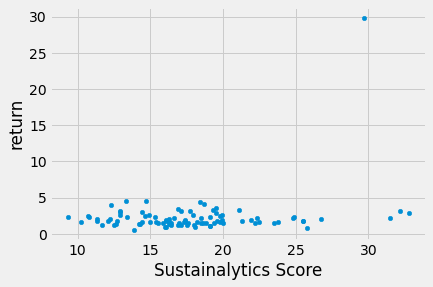

In [20]:
#plot the Sustainalytics ESG score by 2019-2021 returns, no relationship
tech_comms_df_final.plot.scatter(x = 'Sustainalytics Score', y = 'return')

<AxesSubplot:xlabel='MSCI ESG 2021', ylabel='return'>

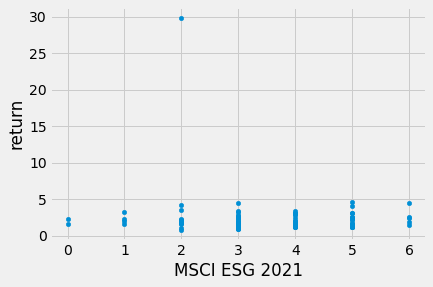

In [21]:
#plot 2021 MSCI ESG and return - no relationship
tech_comms_df_final.plot.scatter(x = 'MSCI ESG 2021', y = 'return')

In [7]:
sector_tickers_df = pd.read_csv('sector_indices.csv', index_col=0)
sector_tickers_df

,SPDR ETF
Sector,
Communication Services,XLC
Consumer Discretionary,XLY
Consumer Staples,XLP
Energy,XLE
Financials,XLF
Health Care,XLV
Industrials,XLI
Tehcnology,XLK
Materials,XLB


In [8]:
#for loop that pulls data for ticker from Yahoo finance and adds to new df
sector_tickers_list = sector_tickers_df['SPDR ETF'].tolist()
sector_2019_to_2021 = pd.DataFrame()
for item in tqdm(sector_tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2019-01-01', end='2021-04-28')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        sector_2019_to_2021 = pd.concat([sector_2019_to_2021, temp_df], axis=1)
    except:
        continue

In [9]:
sector_2019_to_2021

,XLC_High,XLC_Low,XLC_Open,XLC_Close,XLC_Volume,XLC_Adj Close,XLY_High,XLY_Low,XLY_Open,XLY_Close,...,XLRE_Open,XLRE_Close,XLRE_Volume,XLRE_Adj Close,XLU_High,XLU_Low,XLU_Open,XLU_Close,XLU_Volume,XLU_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,42.035000,40.520000,40.599998,41.830002,4625800.0,41.044052,100.320000,96.790001,97.320000,99.760002,...,30.799999,30.290001,10445000.0,28.099930,52.759998,51.700001,52.709999,52.009998,25173900.0,48.323509
2019-01-03,41.880001,41.060001,41.560001,41.130001,3433700.0,40.357204,99.239998,97.430000,99.000000,97.599998,...,30.260000,30.430000,9743800.0,28.229805,52.439999,51.759998,52.009998,52.000000,21587500.0,48.314220
2019-01-04,43.009998,41.669998,41.810001,42.900002,2647900.0,42.093941,101.570000,98.720001,98.919998,100.830002,...,30.680000,30.740000,9620900.0,28.517389,52.799999,51.689999,51.759998,52.770000,19003500.0,49.029644
2019-01-07,43.570000,42.810001,42.950001,43.389999,4048400.0,42.574738,103.769997,101.260002,101.309998,103.110001,...,30.780001,31.000000,5141800.0,28.758591,52.669998,52.119999,52.439999,52.410000,16267700.0,48.695160
2019-01-08,44.180000,43.490002,43.810001,44.119999,2144800.0,43.291019,104.809998,102.769997,104.180000,104.250000,...,31.190001,31.540001,7575900.0,29.259552,53.119999,52.169998,52.459999,53.060001,16643500.0,49.299088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,76.464996,75.290001,76.309998,75.570000,3532900.0,75.570000,178.429993,175.330002,178.169998,175.979996,...,42.130001,42.000000,4074600.0,42.000000,67.330002,66.610001,67.099998,66.669998,8991800.0,66.669998
2021-04-23,76.669998,75.737999,75.900002,76.449997,2741900.0,76.449997,178.550003,175.979996,176.550003,177.820007,...,42.110001,42.240002,3551700.0,42.240002,66.919998,66.410004,66.699997,66.580002,8440800.0,66.580002
2021-04-26,76.750000,76.419998,76.610001,76.610001,2767100.0,76.610001,179.169998,177.440002,178.419998,178.600006,...,42.410000,42.330002,2893600.0,42.330002,66.650002,66.000000,66.610001,66.199997,6289200.0,66.199997


In [14]:
sector_2019_to_2021 = sector_2019_to_2021.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [15]:
sector_2019_to_2021.to_csv('sector_2019_to_2021.csv')

In [23]:
import plotly.express as px 
import pandas as pd 
import numpy as np 


fig = px.line(sector_2019_to_2021, x='Date', y = 'XLC_Close')

# Show plot 
fig.show()